# Scale-Invarient Feature Transform(SIFT)

The SIFT (Scale-Invariant Feature Transform) algorithm is a computer vision technique used for feature detection and description. It detects distinctive key points or features in an image that are robust to changes in scale, rotation, and affine transformations. SIFT works by identifying keypoints based on their local intensity extrema and computing descriptors that capture the local image information around those keypoints. These descriptors can then be used for tasks like image matching, object recognition, and image retrieval. The major advantage of SIFT features, over-edge features, or hog features is that they are not affected by the size or orientation of the image.

There are mainly four steps involved in the SIFT algorithm. They are:
- Scale-space peak selection
- Keypoint Localization
- Orientation Assignment
- keypoint Matching





In [1]:
# import necessary Libraries
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt


In [2]:
# Load the image in grayscale
image_path = '../dataset/tiger.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

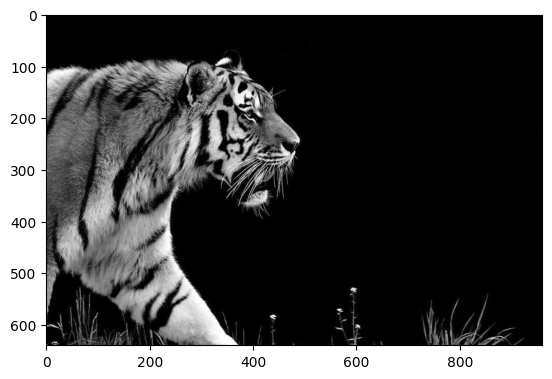

In [3]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [4]:
# define parameters
sigma = 1.6
octaves = 4
scales_per_octave = 5


In [5]:
# 1. Generate Gaussian Pyramids
def generate_gaussian_pyramid(image, octaves, scales):
    pyramid = []
    for _ in range(octaves):
        octave = []
        for _ in range(scales):
            image = gaussian_filter(image, sigma)
            octave.append(image)
        pyramid.append(octave)
        image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
    return pyramid

In [6]:
gaussian_pyramid = generate_gaussian_pyramid(image, octaves, scales_per_octave)

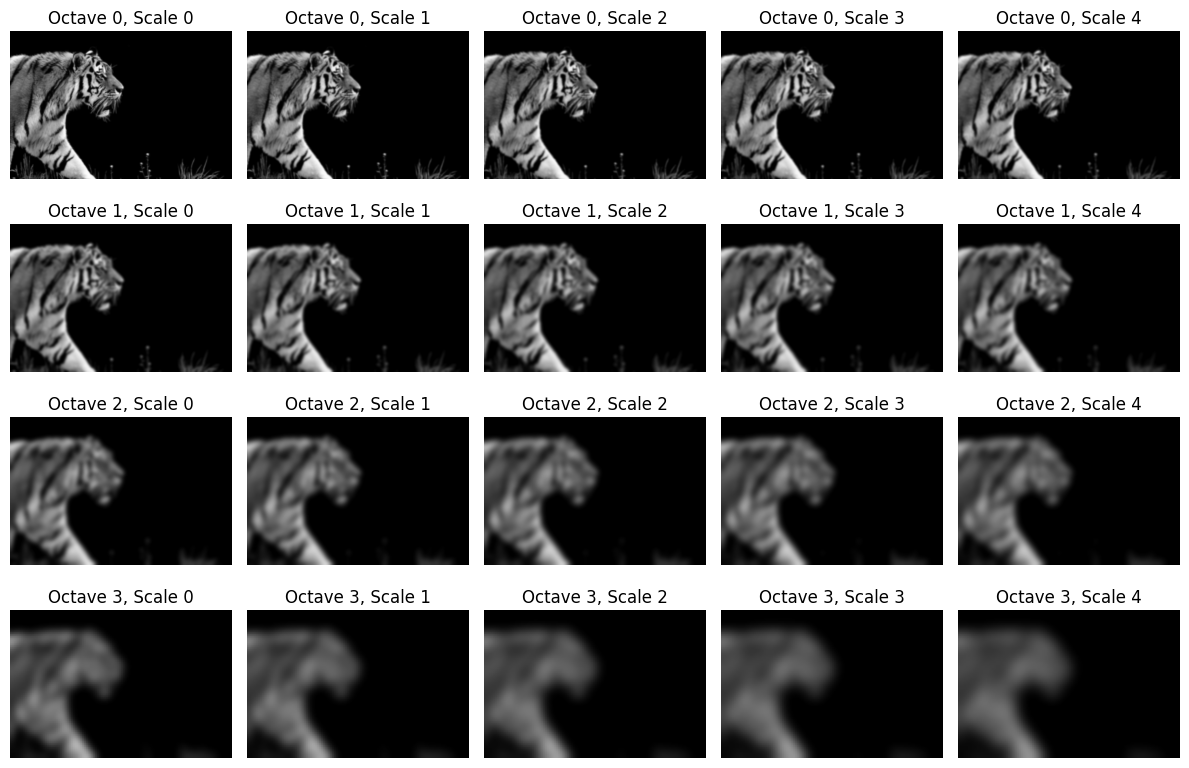

In [7]:
# Create a grid of subplots to display the pyramid
rows = len(gaussian_pyramid)
cols = scales_per_octave
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Display each level of the pyramid
for row in range(rows):
    for col in range(cols):
        ax = axes[row, col]
        ax.imshow(cv2.cvtColor(gaussian_pyramid[row][col],cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(f'Octave {row}, Scale {col}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# 2. Generate Difference-of-Gaussian (DoG) Pyramids
def generate_dog_pyramid(gaussian_pyramid):
    dog_pyramid = []
    for octave in gaussian_pyramid:
        dog_octave = [octave[i] - octave[i - 1] for i in range(1, len(octave))]
        dog_pyramid.append(dog_octave)
    return dog_pyramid

In [9]:
dog_pyramid = generate_dog_pyramid(gaussian_pyramid)

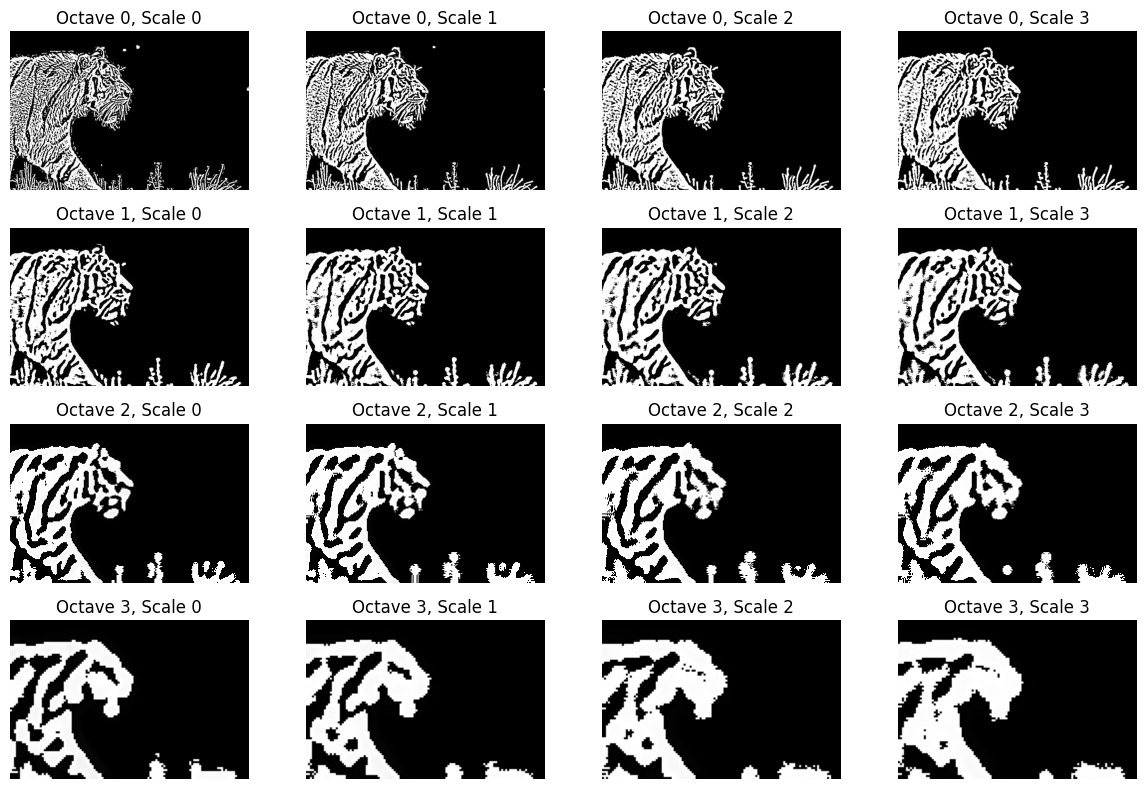

In [10]:
# Create a grid of subplots to display the DoG pyramid
rows = len(dog_pyramid)
cols = scales_per_octave - 1  # One less than the number of scales per octave
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Display each level of the DoG pyramid
for row in range(rows):
    for col in range(cols):
        ax = axes[row, col]
        ax.imshow(dog_pyramid[row][col], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Octave {row}, Scale {col}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Import Resources and Display Features

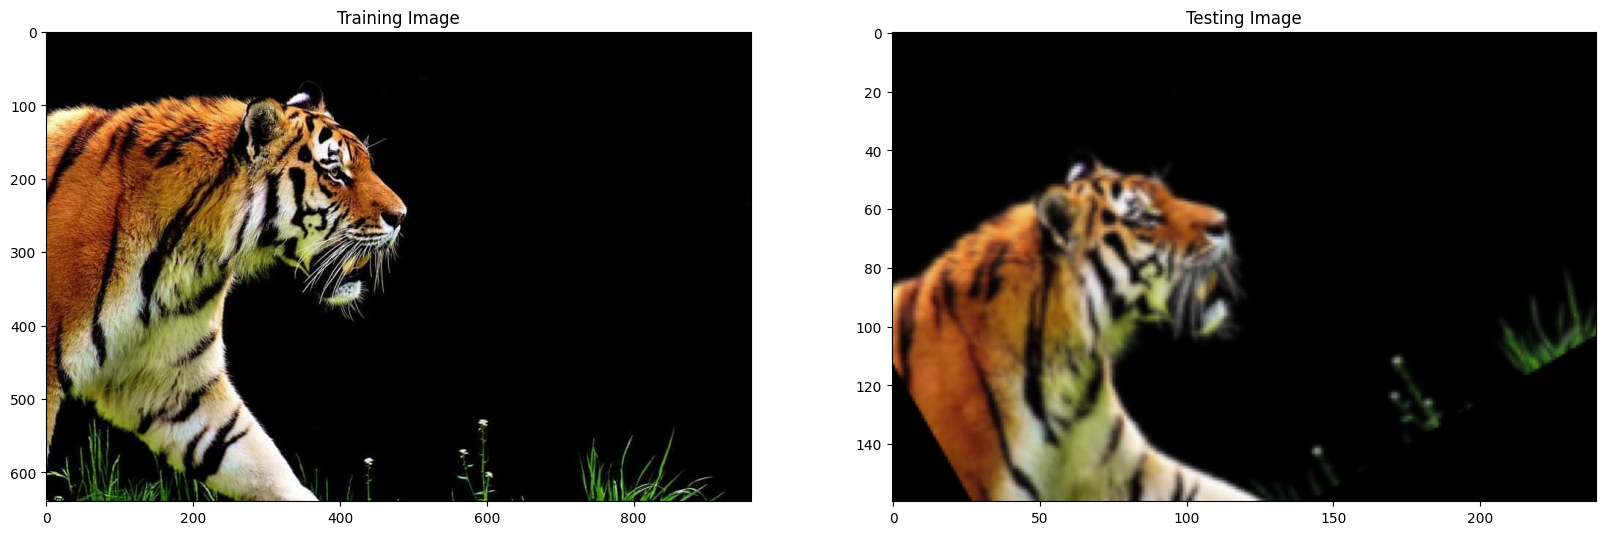

In [11]:
# Load the image
image1 = cv2.imread(image_path)

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)



## Detect keypoints and Create Descriptor

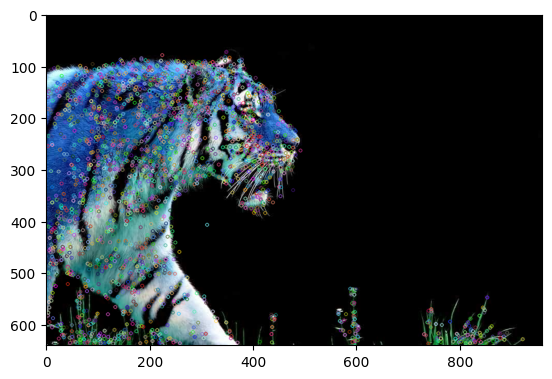

In [12]:
gray= cv2.cvtColor(training_image,cv2.COLOR_BGR2RGB)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,image)
plt.imshow(img)

In [13]:
img=cv2.drawKeypoints(gray,kp,training_gray,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

True

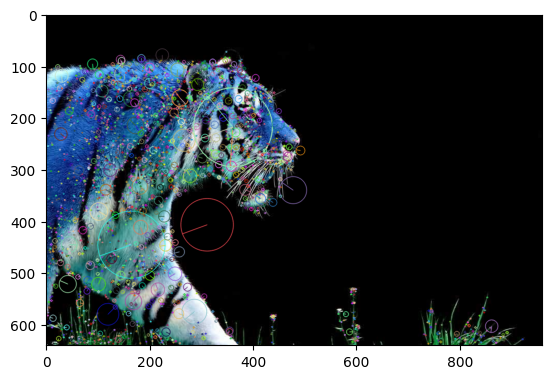

In [22]:
plt.imshow(img)

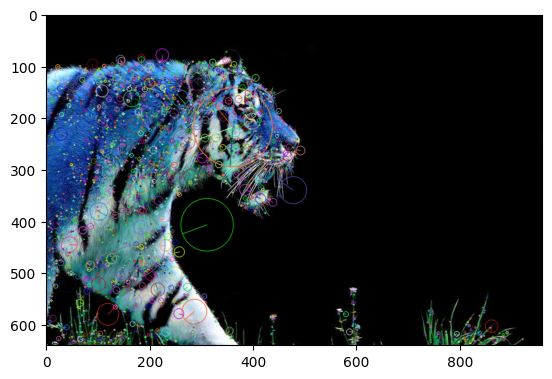

In [20]:
test_img=cv2.drawKeypoints(gray,kp,test_gray,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(test_img)


Text(0.5, 1.0, 'Mapping Image')

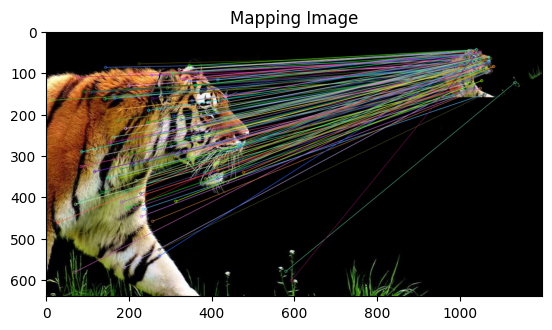

In [17]:
# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(training_image, None)
keypoints2, descriptors2 = sift.detectAndCompute(test_image, None)

# Create a Brute Force Matcher
bf = cv2.BFMatcher()

# Match descriptors between the two images
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test to select good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matches
result_image = cv2.drawMatches(training_image, keypoints1, test_image, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.imshow(result_image)
plt.title("Mapping Image")
